<a href="https://colab.research.google.com/github/ujjwalvishwakarma2006/ujjwalvishwakarma2006/blob/main/California_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cmasher as cmr

In [74]:
data = pd.read_csv("drive/MyDrive/housing.csv")

In [75]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [76]:
data.info()

# Used to get information about dataset, like which coluns have which data types, and we can see that in total_bedroom column we nearly
# have 200 null values, so we need to filter out our data and delete that data, which we are doing in the next section


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
data.dropna(inplace = True)
data

# inplace is for deleting the data within the same file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [78]:
# Spliting the dataset into training at testing data

from sklearn.model_selection import train_test_split

# since our ultimate goal is to find out median_hosue_value, we will name this as y and other data will be our x input
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

# X -> to see X
# y -> to see y

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# X_train

In [80]:
# Now we need to again join our data so that we can explore and work with it

train_data = X_train.join(y_train)
ocean_proximity = train_data['ocean_proximity']
train_data.drop(['ocean_proximity'], axis = 1, inplace=True)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19744,-122.38,40.20,16.0,2722.0,511.0,1366.0,495.0,2.8447,87700.0
13822,-117.21,34.49,14.0,2125.0,348.0,1067.0,360.0,3.6333,116200.0
13219,-117.69,34.00,28.0,707.0,154.0,561.0,129.0,2.5781,111600.0
14109,-117.11,32.75,34.0,2131.0,594.0,1373.0,562.0,2.1130,102100.0
12336,-116.63,33.89,22.0,1540.0,364.0,610.0,268.0,1.5227,71000.0
...,...,...,...,...,...,...,...,...,...
13903,-116.38,34.20,14.0,4985.0,1238.0,2517.0,954.0,2.0674,65000.0
7163,-118.17,34.04,46.0,705.0,167.0,655.0,149.0,3.5938,141100.0
1171,-121.58,39.50,29.0,1947.0,383.0,925.0,337.0,2.1658,57600.0
15458,-117.26,33.18,9.0,4540.0,793.0,2235.0,746.0,4.5781,225600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

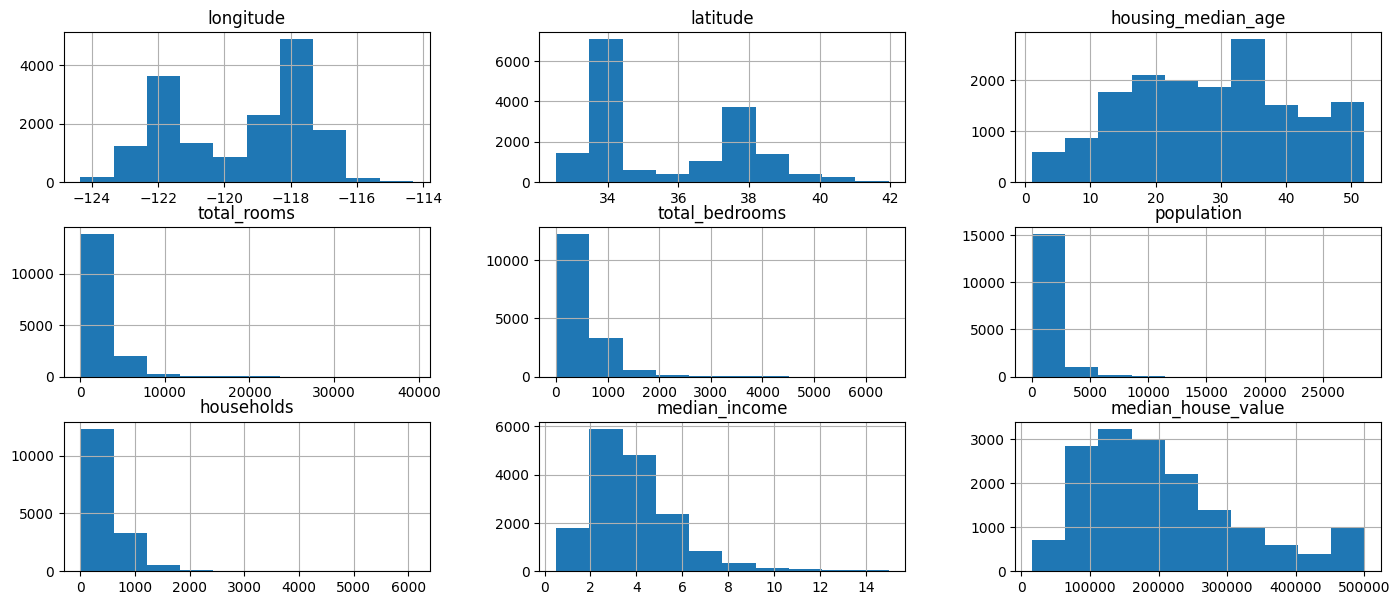

In [81]:
train_data.hist(figsize = (17, 7))

In [82]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924367,-0.112886,0.049341,0.073717,0.102696,0.059928,-0.014471,-0.044165
latitude,-0.924367,1.000000,0.016514,-0.041679,-0.071911,-0.112756,-0.075839,-0.080986,-0.145096
housing_median_age,-0.112886,0.016514,1.000000,-0.364362,-0.323049,-0.301900,-0.305990,-0.123172,0.099607
total_rooms,0.049341,-0.041679,-0.364362,1.000000,0.929642,0.866766,0.920153,0.202394,0.135474
total_bedrooms,0.073717,-0.071911,-0.323049,0.929642,1.000000,0.886214,0.980729,-0.002665,0.052241
population,0.102696,-0.112756,-0.301900,0.866766,0.886214,1.000000,0.913867,0.012490,-0.021277
households,0.059928,-0.075839,-0.305990,0.920153,0.980729,0.913867,1.000000,0.018722,0.067228
median_income,-0.014471,-0.080986,-0.123172,0.202394,-0.002665,0.012490,0.018722,1.000000,0.688339
median_house_value,-0.044165,-0.145096,0.099607,0.135474,0.052241,-0.021277,0.067228,0.688339,1.000000


<Axes: >

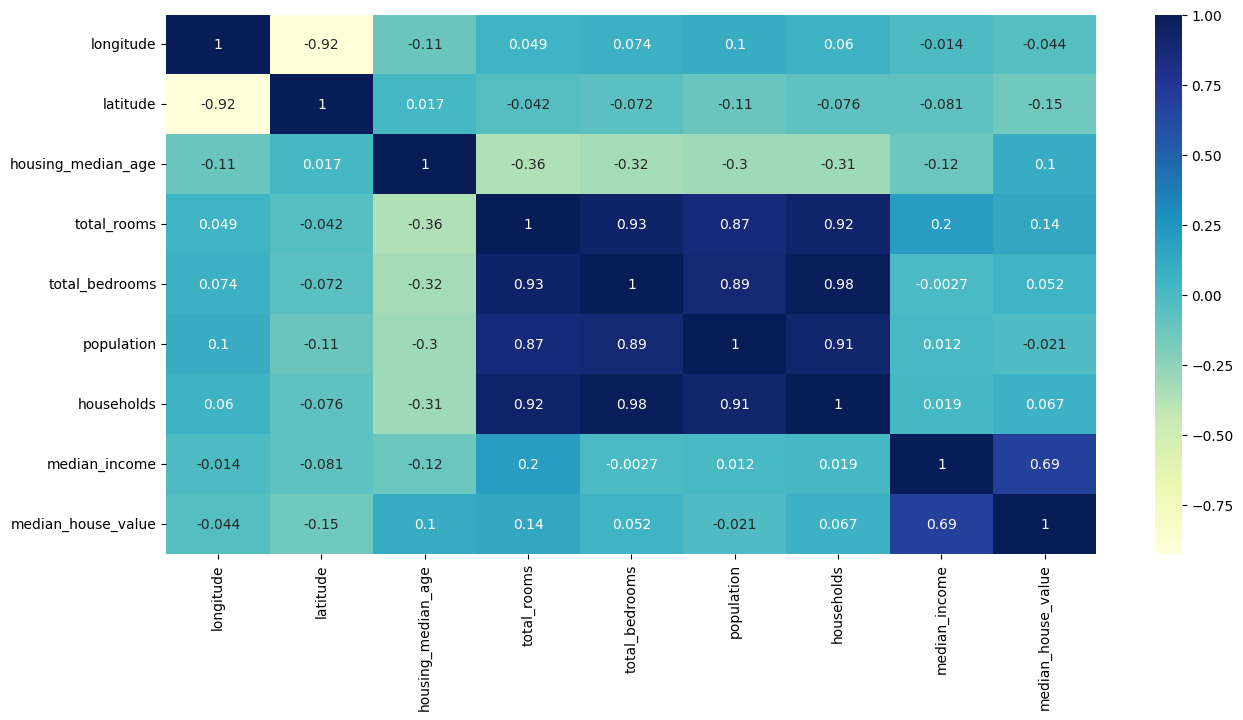

In [83]:
plt.figure(figsize = (15, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

# this is used to see see correlation between elements of a matrix, i.e., each element will have a factor of 1 with itself
# a[i][i] = 1
# here annot = true so that we can see actual numbers of correlation matrix, and c map stand for color map

# now from the below heat map we can see in the meadian_house_value column that it greatly depends upon the median_income
# so it will play am major role in determining the median_house_value

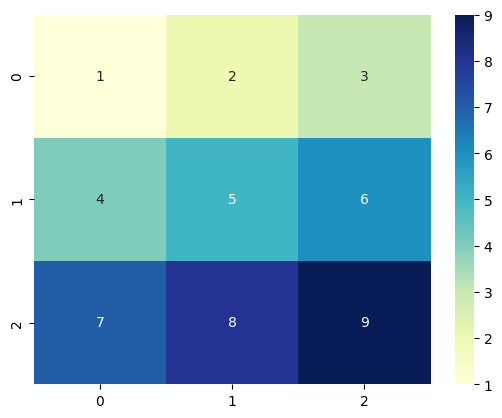

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is a 2D dataset
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]

# Create the heatmap
sns.heatmap(data, annot = True, cmap = "YlGnBu")

# Display the plot
plt.show()

# plt.show() is not necessary to see the heatmap


In [85]:
# now we have to pre process the data
# we can see that we have a bunch of skewed columns (more specially right skewed)
# 1. total_rooms
# 2. total_bedrooms
# 3. population
# 4. households
# for this let us take the logarithm of these columns and let use see what happens

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

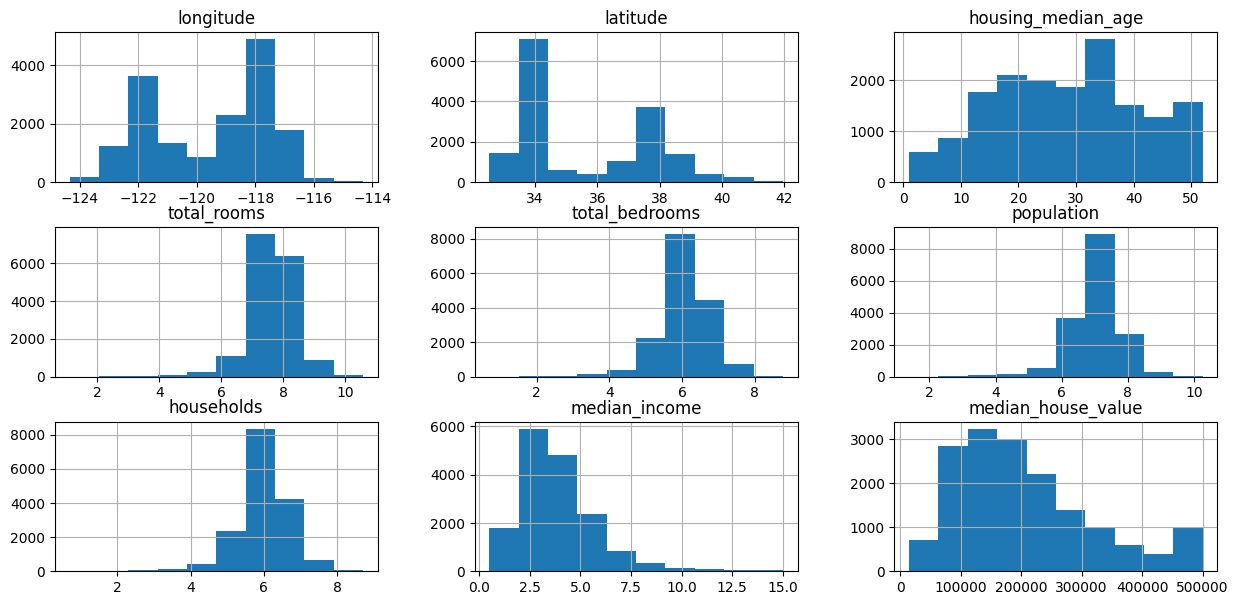

In [86]:
train_data.hist(figsize = (15, 7))

# look our data is no more skewed now
# it looks like gaussian bell curve


In [87]:
train_data['ocean_proximity'] = ocean_proximity
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19744,-122.38,40.20,16.0,7.909489,6.238325,7.220374,6.206576,2.8447,87700.0,INLAND
13822,-117.21,34.49,14.0,7.661998,5.855072,6.973543,5.888878,3.6333,116200.0,INLAND
13219,-117.69,34.00,28.0,6.562444,5.043425,6.331502,4.867534,2.5781,111600.0,INLAND
14109,-117.11,32.75,34.0,7.664816,6.388561,7.225481,6.333280,2.1130,102100.0,NEAR OCEAN
12336,-116.63,33.89,22.0,7.340187,5.899897,6.415097,5.594711,1.5227,71000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
13903,-116.38,34.20,14.0,8.514389,7.122060,7.831220,6.861711,2.0674,65000.0,INLAND
7163,-118.17,34.04,46.0,6.559615,5.123964,6.486161,5.010635,3.5938,141100.0,<1H OCEAN
1171,-121.58,39.50,29.0,7.574558,5.950643,6.830874,5.823046,2.1658,57600.0,INLAND
15458,-117.26,33.18,9.0,8.420903,6.677083,7.712444,6.616065,4.5781,225600.0,NEAR OCEAN


In [88]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19744,-122.38,40.20,16.0,7.909489,6.238325,7.220374,6.206576,2.8447,87700.0,0,1,0,0,0
13822,-117.21,34.49,14.0,7.661998,5.855072,6.973543,5.888878,3.6333,116200.0,0,1,0,0,0
13219,-117.69,34.00,28.0,6.562444,5.043425,6.331502,4.867534,2.5781,111600.0,0,1,0,0,0
14109,-117.11,32.75,34.0,7.664816,6.388561,7.225481,6.333280,2.1130,102100.0,0,0,0,0,1
12336,-116.63,33.89,22.0,7.340187,5.899897,6.415097,5.594711,1.5227,71000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,-116.38,34.20,14.0,8.514389,7.122060,7.831220,6.861711,2.0674,65000.0,0,1,0,0,0
7163,-118.17,34.04,46.0,6.559615,5.123964,6.486161,5.010635,3.5938,141100.0,1,0,0,0,0
1171,-121.58,39.50,29.0,7.574558,5.950643,6.830874,5.823046,2.1658,57600.0,0,1,0,0,0
15458,-117.26,33.18,9.0,8.420903,6.677083,7.712444,6.616065,4.5781,225600.0,0,0,0,0,1


<Axes: >

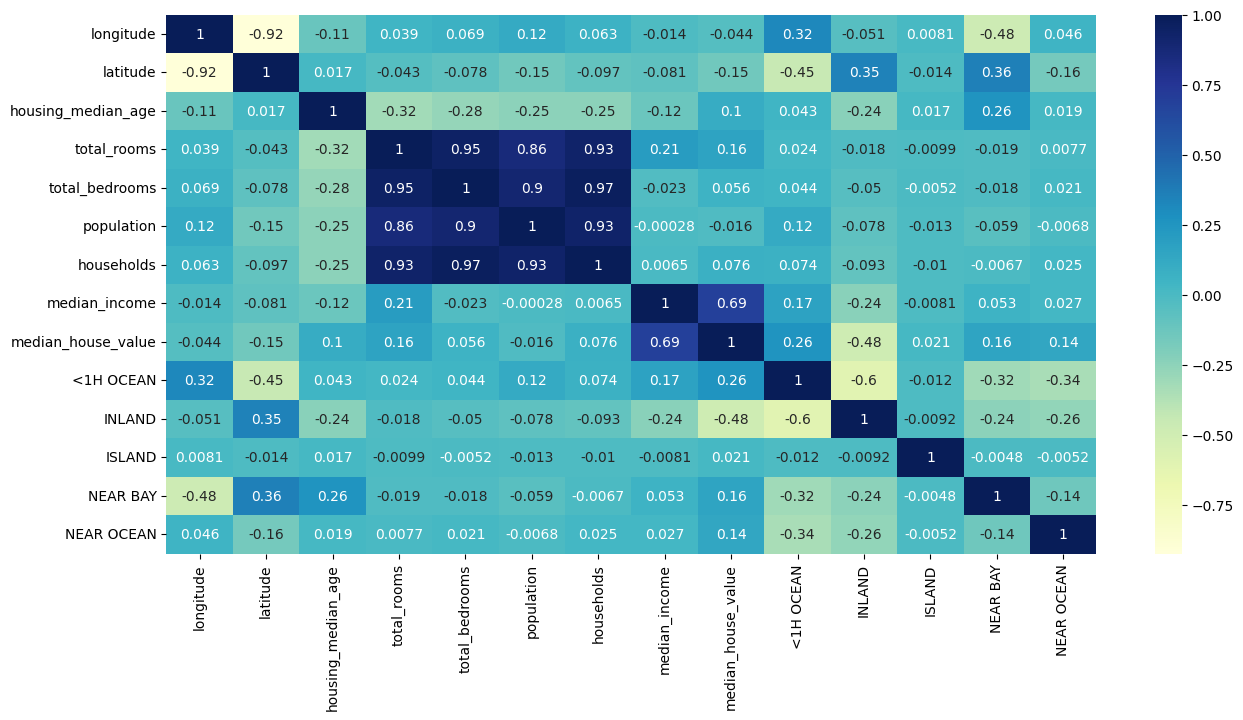

In [89]:
plt.figure(figsize = (15, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

# we can now see that if building is less than <1H ocean than prices are high (median_hosue_value depending positively)
# and if it is inland than it is depending negatively with the median_hosue_value


<Axes: xlabel='latitude', ylabel='longitude'>

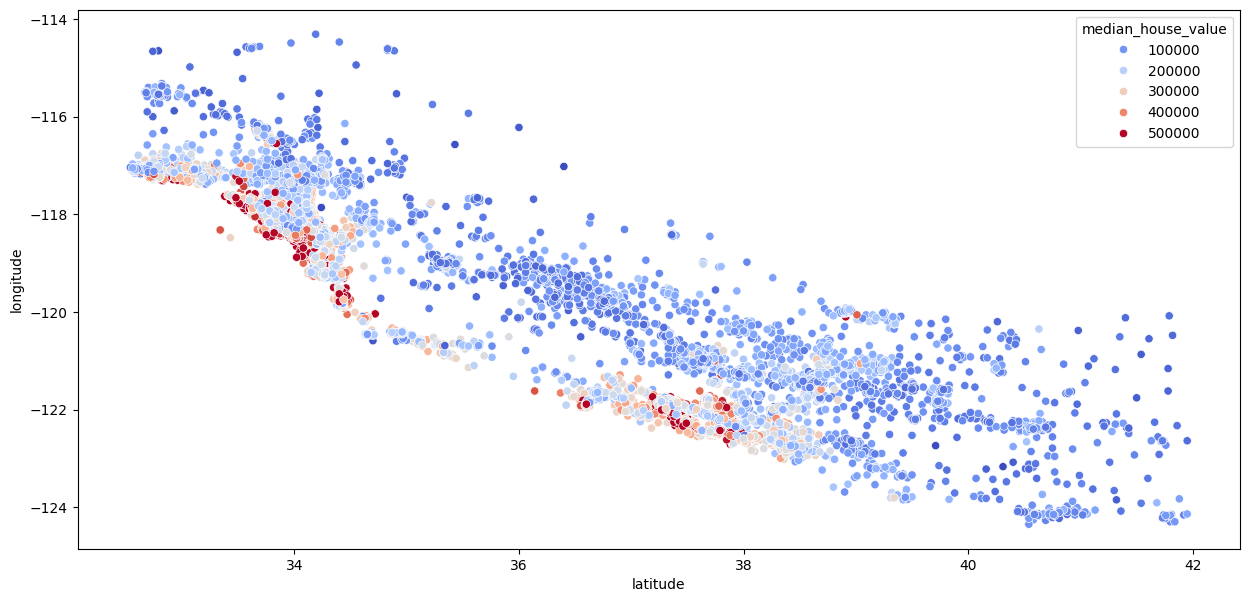

In [90]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")
# plt.scatter()

# This is like a map of california (similar to it)
# more reddish price implying that more is the price of the house
# topright is land and bottomleft is ocean
# So we can see that some house that are near to the ocean are expensive than other houses

In [91]:
# we from our side can also add new features in our data
# for example, we have two features named as total_rooms and total_bedrooms
# now we can define a new features named as bedroom_ratio = total_bedrooms / total_rooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
train_data

# this part of training the model is called feature engineering, and it can be a one of main steps in determining the accuracy of the final model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19744,-122.38,40.20,16.0,7.909489,6.238325,7.220374,6.206576,2.8447,87700.0,0,1,0,0,0,0.788714,1.274372
13822,-117.21,34.49,14.0,7.661998,5.855072,6.973543,5.888878,3.6333,116200.0,0,1,0,0,0,0.764170,1.301096
13219,-117.69,34.00,28.0,6.562444,5.043425,6.331502,4.867534,2.5781,111600.0,0,1,0,0,0,0.768528,1.348207
14109,-117.11,32.75,34.0,7.664816,6.388561,7.225481,6.333280,2.1130,102100.0,0,0,0,0,1,0.833492,1.210244
12336,-116.63,33.89,22.0,7.340187,5.899897,6.415097,5.594711,1.5227,71000.0,0,1,0,0,0,0.803780,1.311987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,-116.38,34.20,14.0,8.514389,7.122060,7.831220,6.861711,2.0674,65000.0,0,1,0,0,0,0.836473,1.240855
7163,-118.17,34.04,46.0,6.559615,5.123964,6.486161,5.010635,3.5938,141100.0,1,0,0,0,0,0.781138,1.309138
1171,-121.58,39.50,29.0,7.574558,5.950643,6.830874,5.823046,2.1658,57600.0,0,1,0,0,0,0.785609,1.300790
15458,-117.26,33.18,9.0,8.420903,6.677083,7.712444,6.616065,4.5781,225600.0,0,0,0,0,1,0.792918,1.272796


<Axes: >

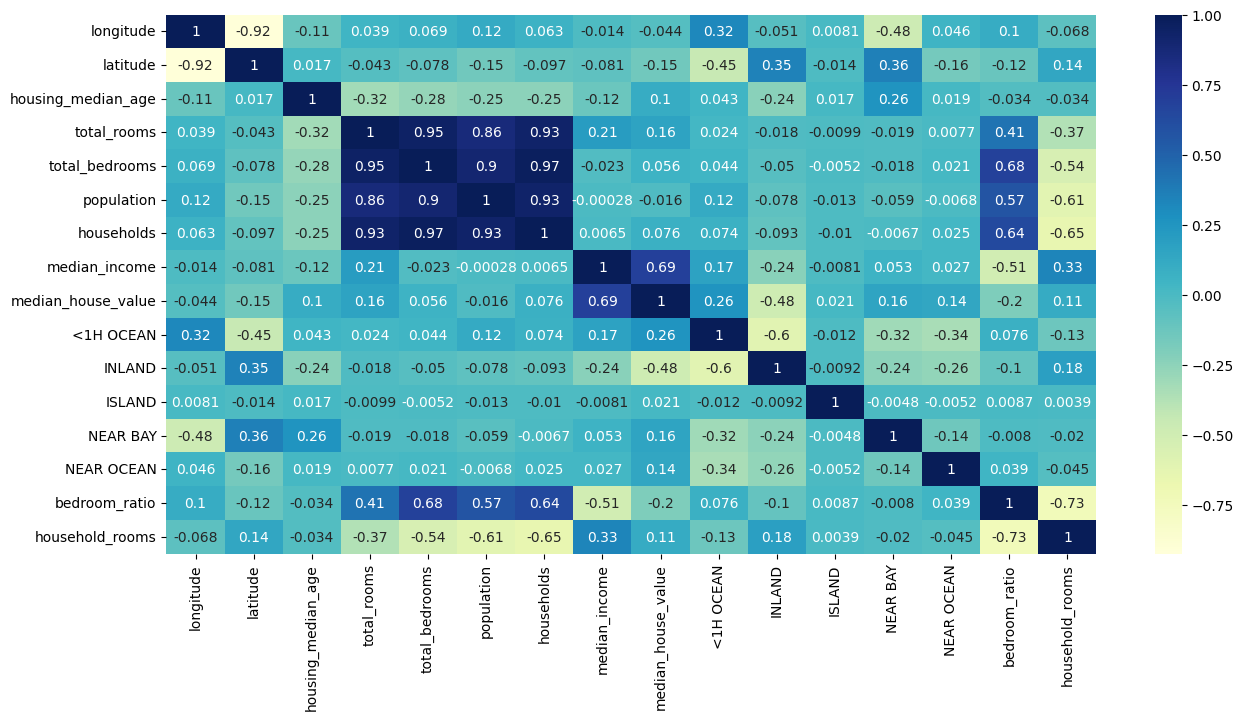

In [92]:
plt.figure(figsize = (15, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

# we can see that bedroom_ratio have a significantly negative ratio with median_house_value

In [93]:
# the linear regression thing
# now we need to again split the data as our x and y
# earlier x_train and y_train are no more useful for us now because we processed that data.

from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression();

train_data

np.isfinite(X_train).all()
# np.isfinite(y_train).all()

reg.fit(X_train, y_train)



LinearRegression()

In [94]:
# since our model is ready now, (and it is trained on non scaled data, so we are not hoping very good results), we can test it with our test data
# but we need to process our test data in the same manner as of train data

# what we have learn from here that, splitting the data too early was not a good thing
# always split the data when you completely pre processed it and just one step away from you model

# so let's do it

test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1074,-121.82,39.75,29.0,8.954803,7.226936,8.106816,7.219642,3.0253,111400.0,0,1,0,0,0,0.807046,1.240339
49,-122.27,37.82,40.0,6.853299,5.929589,6.552508,5.866468,1.7750,112500.0,0,0,0,1,0,0.865217,1.168216
15339,-117.31,33.18,16.0,7.515345,6.066108,6.396930,5.991465,2.0147,87700.0,0,0,0,0,1,0.807163,1.254342
5878,-118.35,34.16,45.0,7.237778,5.641907,6.289716,5.602119,4.2212,293800.0,1,0,0,0,0,0.779508,1.291972
18781,-122.29,40.39,17.0,7.428333,5.808142,6.788972,5.758902,1.8438,76400.0,0,1,0,0,0,0.781890,1.289887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,-118.48,34.19,20.0,8.648221,7.374629,8.245384,7.231287,2.8646,221100.0,1,0,0,0,0,0.852734,1.195945
1942,-120.93,38.65,12.0,7.702556,5.953243,7.001246,5.863631,4.5568,170100.0,0,1,0,0,0,0.772892,1.313615
10990,-117.81,33.74,24.0,7.899895,6.476972,7.554335,6.440947,3.3047,216900.0,1,0,0,0,0,0.819881,1.226512
11493,-117.99,33.69,12.0,7.816417,6.755769,7.273786,6.670766,1.6705,350000.0,1,0,0,0,0,0.864305,1.171742


In [95]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [96]:
reg.score(X_test, y_test)

0.6851329806367606

# **Linear regression model accuracy**
 **68.51** %

In [102]:
# We can do a little more thing here, and that is scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

# We actually don't need to scale our final output, i.e., y_train & y_test

reg.fit(X_train_s, y_train)

reg.score(X_test_s, y_test)

# not much effect on our final output


0.6852769707492413

## **Random Forest**

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

forest.score(X_train, y_train)

0.9739931721663276

In [104]:
forest.score(X_test, y_test)

# look without anything we already got way better accuracy than our original approach

0.8193479156632539

In [106]:
forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)

0.7733441101197664